# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [5]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [204]:
# Importing the file porter_data_1.csv
df=pd.read_csv('porter_data_1.csv')
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   market_id                  175777 non-null  float64       
 1   order_protocol             175777 non-null  float64       
 2   total_items                175777 non-null  int64         
 3   subtotal                   175777 non-null  int64         
 4   num_distinct_items         175777 non-null  int64         
 5   min_item_price             175777 non-null  int64         
 6   max_item_price             175777 non-null  int64         
 7   total_onshift_dashers      175777 non-null  float64       
 8   total_busy_dashers         175777 non-null  float64       
 9   total_outstanding_orders   175777 non-null  float64       
 10  distance                   175777 non-null  float64       
 11  datetime                   175777 non-null  datetime

In [206]:
df.isna().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
dtype: int64

In [208]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['datetime'] = pd.to_datetime(df['created_at'])

df['created_at_date'] = df['datetime'].dt.date 
df['created_at_time'] = df['datetime'].dt.time 

df['datetime_1'] = pd.to_datetime(df['actual_delivery_time'])

df['actual_delivery_time_date'] = df['datetime_1'].dt.date 
df['actual_delivery_time_time'] = df['datetime_1'].dt.time 

df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance            datetime  \
0                14.0                      21.0     34.44 2015-02-06 22:24:17   
1                 2.0                       2.0     27.60 2015-02-10 21:49:25   
2                 6.0                      18.0     11.56 2015-02-16 00:11:35   
3                 6.0                       8.0     31.80 2015-02-12 03:36:46   
4                 5.0                       7.0      8.20 2015-01-27 02:12:36   

  created_at_date created_at_time          datetime_1  \
0      2015-02-06        22:24:17 2015-02-06 23:11:17   
1      2015-02-10        21:49:25 2015-02-10 22:33:25   
2      2015-02-16        00:11:35 2015-02-16 01:06:35   
3      2015-02-12        03:36:46 2015-02-12 04:35:46   
4      2015-01-27        02:12:36 2015-01-27 02:58:36   

  actual_delivery_time_date actual_delivery_time_time  
0                2015-02-06                  23:11:17  
1                2015-02-10                  22:33:25  
2                2015-02-16                  01:06:35  
3                2015-02-12                  04:35:46  
4                2015-01-27                  02:58:36

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [21]:
# Convert categorical features to category type
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)
df[cat_col].nunique()


Categorical columns : ['created_at', 'actual_delivery_time', 'date', 'time', 'created_at_date', 'created_at_time', 'actual_delivery_time_date', 'actual_delivery_time_time']
Numerical columns : ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'datetime', 'datetime_1']


created_at                   162649
actual_delivery_time         160344
date                             29
time                          44899
created_at_date                  29
created_at_time               44899
actual_delivery_time_date        29
actual_delivery_time_time     44943
dtype: int64

In [212]:
df['actual_delivery_time']=df['actual_delivery_time'].astype('datetime64[ns]')
df['created_at']=df['created_at'].astype('datetime64[ns]')
df['hour']=df['created_at'].dt.hour
df['day']=df['created_at'].dt.dayofweek

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [214]:
# Calculate time taken in minutes
df['Time_taken_for_delivery']= (df['actual_delivery_time']-df['created_at'])/pd.Timedelta('60s')


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [216]:
# Extract the hour and day of week from the 'created_at' timestamp

df['hour']=df['created_at'].dt.hour
df['day']=df['created_at'].dt.dayofweek
df.head()

# Create a categorical feature 'isWeekend'



market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  ...  distance            datetime  created_at_date  \
0            1239  ...     34.44 2015-02-06 22:24:17       2015-02-06   
1            1400  ...     27.60 2015-02-10 21:49:25       2015-02-10   
2            1604  ...     11.56 2015-02-16 00:11:35       2015-02-16   
3            1525  ...     31.80 2015-02-12 03:36:46       2015-02-12   
4            2195  ...      8.20 2015-01-27 02:12:36       2015-01-27   

   created_at_time          datetime_1 actual_delivery_time_date  \
0         22:24:17 2015-02-06 23:11:17                2015-02-06   
1         21:49:25 2015-02-10 22:33:25                2015-02-10   
2         00:11:35 2015-02-16 01:06:35                2015-02-16   
3         03:36:46 2015-02-12 04:35:46                2015-02-12   
4         02:12:36 2015-01-27 02:58:36                2015-01-27   

  actual_delivery_time_time hour day Time_taken_for_delivery  
0                  23:11:17   22   4                    47.0  
1                  22:33:25   21   1                    44.0  
2                  01:06:35    0   0                    55.0  
3                  04:35:46    3   3                    59.0  
4                  02:58:36    2   1                    46.0  

[5 rows x 23 columns]

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [218]:
# Define target variable (y) and features (X)
df['Time_taken_for_delivery'].head(5)


0    47.0
1    44.0
2    55.0
3    59.0
4    46.0
Name: Time_taken_for_delivery, dtype: float64

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [220]:
# Split data into training and testing sets
df['Time_taken_for_delivery'].isnull()


0         False
1         False
2         False
3         False
4         False
          ...  
175772    False
175773    False
175774    False
175775    False
175776    False
Name: Time_taken_for_delivery, Length: 175777, dtype: bool

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

In [222]:
# Plot distributions for all numerical columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   market_id                  175777 non-null  float64       
 1   created_at                 175777 non-null  datetime64[ns]
 2   actual_delivery_time       175777 non-null  datetime64[ns]
 3   store_primary_category     175777 non-null  int64         
 4   order_protocol             175777 non-null  float64       
 5   total_items                175777 non-null  int64         
 6   subtotal                   175777 non-null  int64         
 7   num_distinct_items         175777 non-null  int64         
 8   min_item_price             175777 non-null  int64         
 9   max_item_price             175777 non-null  int64         
 10  total_onshift_dashers      175777 non-null  float64       
 11  total_busy_dashers         175777 non-null  float64 

In [144]:
df['market_id'].value_counts()


market_id
2.0    53469
4.0    46222
1.0    37115
3.0    21075
5.0    17258
6.0      638
Name: count, dtype: int64

In [162]:
df['distance']= df['distance'].fillna('0.0')


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   market_id                  175777 non-null  object        
 1   created_at                 175777 non-null  datetime64[ns]
 2   actual_delivery_time       175777 non-null  datetime64[ns]
 3   store_primary_category     175777 non-null  object        
 4   order_protocol             175777 non-null  object        
 5   total_items                175777 non-null  int64         
 6   subtotal                   175777 non-null  int64         
 7   num_distinct_items         175777 non-null  int64         
 8   min_item_price             175777 non-null  int64         
 9   max_item_price             175777 non-null  int64         
 10  total_onshift_dashers      175777 non-null  float64       
 11  total_busy_dashers         175777 non-null  float64 

In [260]:
df['order_protocol'] = df['order_protocol'].astype('object')
df['market_id'] = df['market_id'].astype('object')
df['store_primary_category'] = df['store_primary_category'].astype('object')



In [ ]:


df.drop(['created_at','actual_delivery_time','total_onshift_dashers','total_busy_dashers','total_outstanding_orders'],axis=1,inplace=True)
df.drop(['datetime_1','datetime','total_onshift_dashers','total_busy_dashers','total_outstanding_orders'],axis=1,inplace=True)



In [ ]:
df.drop(['created_at_date','created_at_time','actual_delivery_time_date','actual_delivery_time_time','distance'],axis=1,inplace=True)



In [296]:
df['Time_taken_for_delivery'] = df['Time_taken_for_delivery'].astype('object')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   market_id                175777 non-null  object 
 1   store_primary_category   175777 non-null  object 
 2   order_protocol           175777 non-null  object 
 3   total_items              175777 non-null  int64  
 4   subtotal                 175777 non-null  int64  
 5   num_distinct_items       175777 non-null  int64  
 6   min_item_price           175777 non-null  int64  
 7   max_item_price           175777 non-null  int64  
 8   distance                 175777 non-null  float64
 9   hour                     175777 non-null  int32  
 10  day                      175777 non-null  int32  
 11  Time_taken_for_delivery  175777 non-null  object 
dtypes: float64(1), int32(2), int64(5), object(4)
memory usage: 14.8+ MB


<Axes: >

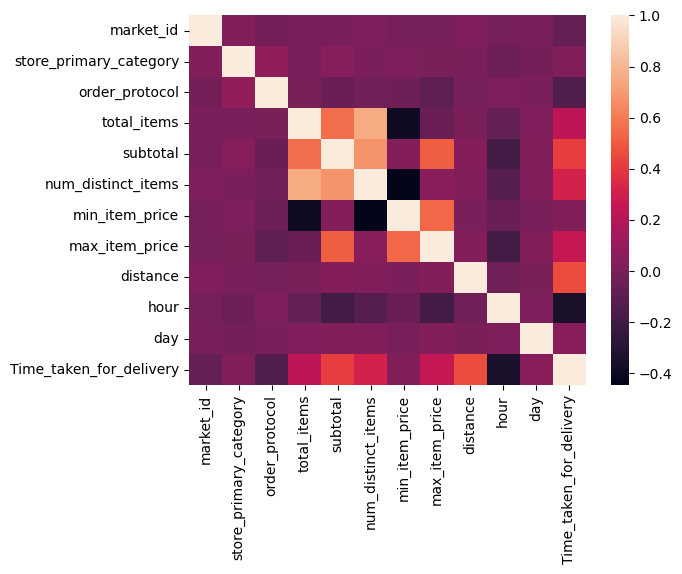

In [298]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr())

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

<Axes: xlabel='store_primary_category', ylabel='total_items'>

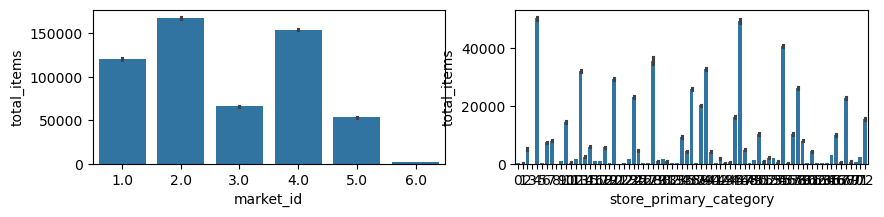

In [301]:
# Distribution of categorical columns
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
sns.barplot(y='total_items',x='market_id',data=df,estimator='sum')
plt.subplot(1,2,2)
sns.barplot(y='total_items',x='store_primary_category',data=df,estimator='sum')


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

<Axes: xlabel='order_protocol', ylabel='total_items'>

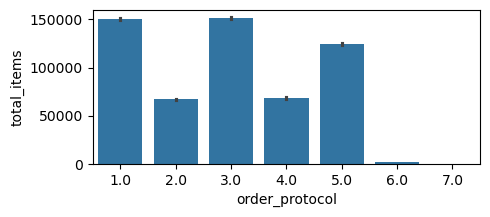

In [304]:
# Distribution of time_taken
plt.figure(figsize=(5,2))
sns.barplot(y='total_items',x='order_protocol',data=df,estimator='sum')


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

<Axes: xlabel='hour', ylabel='Time_taken_for_delivery'>

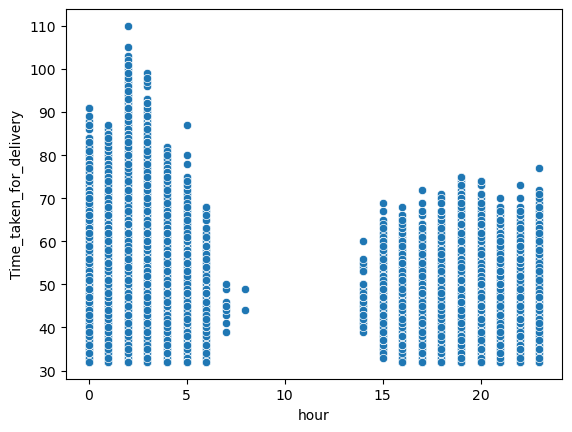

In [308]:
# Scatter plot to visualise the relationship between time_taken and other features

sns.scatterplot(x='hour',y='Time_taken_for_delivery',data=df)

<Axes: xlabel='hour', ylabel='count'>

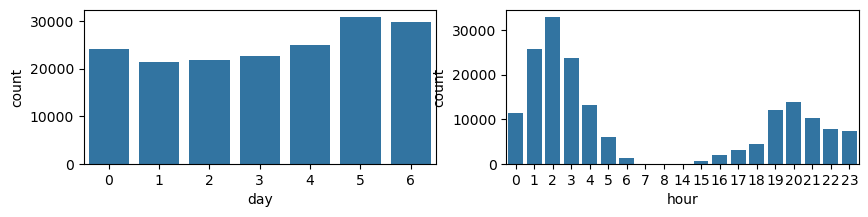

In [310]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(10,2))
plt.subplot(121)
sns.countplot(x=df['day'])
plt.subplot(122)
sns.countplot(x=df['hour'])

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

<Axes: >

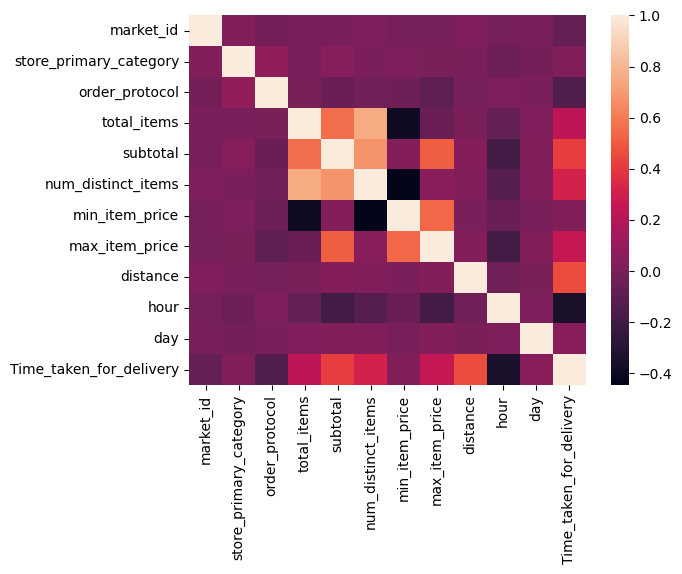

In [312]:
# Plot the heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr())


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [ ]:
# Drop 3-5 weakly correlated columns from training dataset
df.drop(['min_item_price','num_distinct_items'],axis=1,inplace=True)



#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

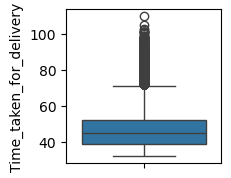

In [314]:
# Boxplot for time_taken
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
sns.boxplot(y='Time_taken_for_delivery',data=df)
plt.xticks(rotation=90);
plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

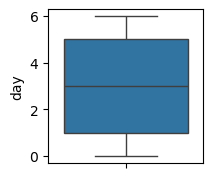

In [316]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
sns.boxplot(y='day',data=df)
plt.xticks(rotation=90);
plt.show()



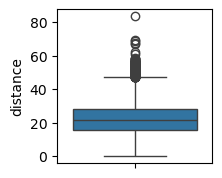

In [320]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
sns.boxplot(y='distance',data=df)
plt.xticks(rotation=90);
plt.show()

In [332]:
# Removing outliers for target variables
import numpy as np
print((df.loc[df['Time_taken_for_delivery'] >80].shape[0] / df.shape[0]) * 100)
df.drop(index=df.loc[df['Time_taken_for_delivery'] >80].index[0],inplace=True)

0.22528801024036413


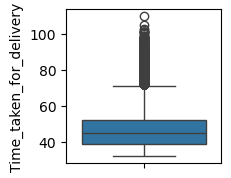

In [334]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
sns.boxplot(y='Time_taken_for_delivery',data=df)
plt.xticks(rotation=90);
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [ ]:
# Import libraries



#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [338]:
# Apply scaling to the numerical columns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
y=df['Time_taken_for_delivery']
x=df.drop(['Time_taken_for_delivery'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)


RandomForestRegressor()

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [ ]:
# Create/Initialise the model


In [339]:
# Train the model using the training data
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
prediction=regressor.predict(X_test)
mse=mean_squared_error(y_test,prediction)
rmse=mse**.5
print("mse : ",mse)
print("rmse : ",rmse)
mae=mean_absolute_error(y_test,prediction)
print("mase : ",mae)
mape=np.mean(np.abs((y_test - prediction)/y_test))*100
print("mape : ",mape)

r2_score(y_test,prediction)


mse :  30.859508012957587
rmse :  5.555133482910882
mase :  4.07312165286159
mape :  8.870330907428261


0.6474296261614172

In [348]:
# Make predictions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [368]:
## set input and output of dataset
## x - independent varibale i.e delivery time
## y - dependent variable i.e sorting time

y=df['Time_taken_for_delivery']
x=df['distance']

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=1234)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=1234)

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [356]:
# Loop through the number of features and test the model
x_test.shape,y_test.shape


((35155,), (35155,))

In [358]:
# Build the final model with selected number of features
x_train.shape,y_train.shape


((140619,), (140619,))

In [370]:
x_train=x_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)
x_test=x_test.values.reshape(-1,1)

In [364]:
lr_model=LinearRegression()

In [372]:
lr_model_fit=lr_model.fit(x_train,y_train)

In [374]:
print(lr_model_fit.intercept_)

[35.51966654]


In [376]:
## coef of model
print(lr_model_fit.coef_)

[[0.48969585]]


In [380]:
y_pred=lr_model_fit.predict(x_test)

In [382]:
df_y_pred=pd.DataFrame(y_pred,columns=['pred'])

In [384]:
df_y_pred['actual']=y_test.values

In [388]:
print(df_y_pred)

            pred actual
0      40.886733   34.0
1      40.024868   38.0
2      43.668206   45.0
3      51.268285   54.0
4      50.759002   56.0
...          ...    ...
35150  47.096077   68.0
35151  44.334192   43.0
35152  41.572307   60.0
35153  48.486813   42.0
35154  41.826949   32.0

[35155 rows x 2 columns]


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

Project insights and conclusion

In [ ]:
# In above project we have dataset of order delievery time and impacting parameters.
# It is observed that delivery time and order protocol has highly correlated.
# Max delivey time taken is more than 80mins.
# There are many outliers some of them crossing 90mins
# Then i have build simple linear regression machine learning model to predit delivery time based on distance.
# model coefficient of determination is 0.48, so model is good.

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model



Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> We have mostly numerical data sets.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>test_size = 0.2 means that 20% of the dataset will be used for testing, and the remaining 80% will be used for training.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Order_protocol



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**
> Using Box Plot



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Total items, num_distint items, day



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear regression is one of the simplest and most commonly used algorithms in machine learning and statistics. It is used to model the relationship between a dependent (target) variable and one or more independent (predictor) variables. The goal of linear regression is to find the best-fitting line (or hyperplane in higher dimensions) that predicts the target variable from the input features.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Both Simple Linear Regression and Multiple Linear Regression are linear models used to predict a dependent variable based on one or more independent variables. However, the key difference lies in the number of predictors (independent variables) used in the model.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function in linear regression plays a crucial role in measuring how well the model’s predictions match the actual data. It quantifies the difference between the predicted values (from the model) and the actual observed values. The goal of linear regression is to minimize this cost function, thereby improving the model's performance.

In simple terms, the cost function tells us how far off our predictions are from the true values. By minimizing this cost, we ensure that the linear regression model provides the best possible fit to the data.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**
Overfitting: Too complex; learns noise and small fluctuations in the data, Low bias, High variance, Very low training error.
Underfitting: Too Simple, High bias, low variane, High training error
>



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots are an essential diagnostic tool in linear regression. They help to assess the quality of a linear regression model by providing insights into the nature of the errors (residuals) in the model’s predictions.

In simple terms, residuals are the differences between the observed values and the predicted values:

A residual plot is a scatter plot of these residuals on the y-axis and the fitted (predicted) values or the independent variable (input feature) on the x-axis.